In [1]:
import rHeston
import BlackScholes as bs
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import ImpliedDrift as iD
import time

from matplotlib import cm

In [2]:
# Read the dataset
dates = np.array(["23_01_23.csv", "24_01_23.csv", "25_01_23.csv", "26_01_23.csv", "27_01_23.csv",
                  "30_01_23.csv", "06_02_23.csv", "13_02_23.csv", "21_02_23.csv"])

spot = np.array(pd.read_csv("spot.csv").Spot).flatten()
moneyness = np.array([80.0,90.0,95.0,97.5,100.0,102.5,105.0,110.0,120.0])

index = 0
data = pd.read_csv(dates[index]); S0 = spot[index];
K = S0 * moneyness / 100

if index:
    maturities = np.array(data.Tenor).flatten()
    IV = np.array(data.drop(columns = ['Date', 'Tenor']))/100.

else:
    maturities = np.array(data['Exp Date']).flatten()
    IV = np.array(data.drop(columns = 'Exp Date'))/100.
    

maturities = maturities[maturities*365 <= 180]
    
nr = len(maturities); nc = len(K);

IV = IV[:nr]

rho = -0.6873522940850871
theta = 0.3317015327486652
H = np.array(pd.read_csv("rHeston_param_for_bayes.csv").H).flatten()

In [3]:
r = iD.r(maturities, index); q = iD.q(maturities, index);
options_type = np.ones(nc)

iv = np.zeros([nr, nc])   
    
for i in range(nr):
    iv[i] = rHeston.analytic_rhest(S0, K, maturities[i], H, rho, theta, options_type)
    iv[i] = bs.BSImpliedVol(S0, K, maturities[i], r[i], q[i], iv[i], Option_type = 1, toll = 1e-5)
    
err = np.mean(abs(IV-iv)/IV)*100

print(f"Mean relative percentage error: {err: .4f}%")

Mean relative percentage error:  2.2626%


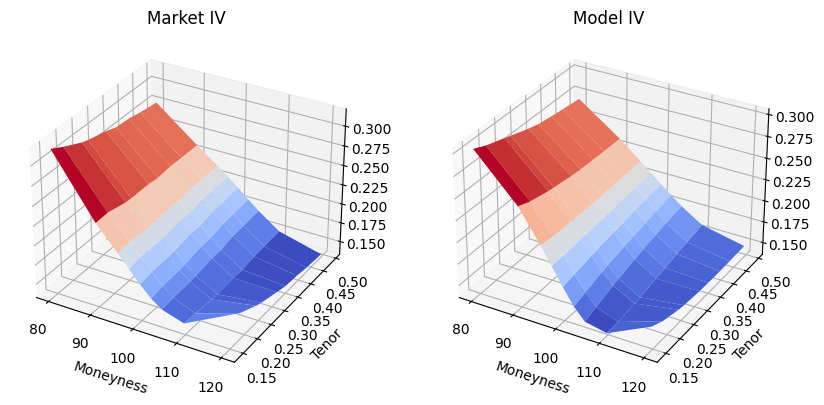

In [4]:
mesh_x, mesh_y = np.meshgrid(moneyness, maturities)

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

ax1 = fig.add_subplot(121,projection='3d')
surf1 = ax1.plot_surface(mesh_x, mesh_y, IV, cmap=cm.coolwarm, antialiased=True)
ax1.set_xlabel('Moneyness')
ax1.set_ylabel('Tenor')
ax1.set_title('Market IV')

ax2 = fig.add_subplot(122,projection='3d')
surf2 = ax2.plot_surface(mesh_x, mesh_y, iv, cmap=cm.coolwarm, antialiased=True)
ax2.set_xlabel('Moneyness')
ax2.set_ylabel('Tenor')
ax2.set_title('Model IV')

plt.show()

In [8]:
np.array(pd.read_csv("rHeston_param_for_bayes.csv")).flatten().round(4)

array([ 0.   ,  0.346,  0.046, -0.678])

In [6]:
pd.read_csv("rHeston_param_for_bayes.csv")

,Unnamed: 0,theta,H,rho
0,0,0.345972,0.046004,-0.678037
